In [19]:
import numpy as np
import matplotlib.pyplot as plt
import estimator
from scipy.optimize import curve_fit


In [28]:
import numpy as np

def true_func(t, omega_i_plus_1, j_i, j_i_plus_1, gamma_i):

    y = (1/4) * (
        np.cos(t * omega_i_plus_1) +
        np.cos(t * (j_i + omega_i_plus_1)) +
        np.cos(t * (j_i_plus_1 + omega_i_plus_1)) +
        np.cos(t * (j_i + j_i_plus_1 + omega_i_plus_1))
    ) * np.exp(-t * gamma_i)
    return y

def fit_parameters(T, y_measured):
    # Initial guesses for the parameters [omega_i_plus_1, j_i, j_i_plus_1, gamma_i]
    initial_guess = [0.0, 0.0, 0.0, 0.1]

    # Set bounds for parameters:
    # omega_i_plus_1, j_i, j_i_plus_1 in [-pi, pi]
    # gamma_i in [0, pi]
    bounds_lower = [-np.pi, -np.pi, -np.pi, 0]
    bounds_upper = [np.pi, np.pi, np.pi, np.pi]

    # Use curve_fit to fit the parameters with bounds
    params, params_covariance = curve_fit(
        true_func, T, y_measured, p0=initial_guess, bounds=(bounds_lower, bounds_upper)
    )

    # Extract fitted parameters
    omega_i_plus_1, j_i, j_i_plus_1, gamma_i = params
    return omega_i_plus_1, j_i, j_i_plus_1, gamma_i, params_covariance

# Example usage
t = 1.0
omega_i_plus_1 = 1
j_i = 1
j_i_plus_1 = 1
gamma_i = 0.5


shots = 10000
measurments = 20
noise_std = 1 / np.sqrt(shots/measurments)  # Standard deviation of Gaussian noise

T_m = np.linspace(0, 2*np.pi, 20)
T =  np.linspace(0, 2*np.pi, 400)
y_true = true_func(T, omega_i_plus_1, j_i, j_i_plus_1, gamma_i)

y_true_at_T_m = true_func(T_m, omega_i_plus_1, j_i, j_i_plus_1, gamma_i)
y_measured = y_true_at_T_m + np.random.normal(loc=0.0, scale=noise_std, size=len(T_m))


omega_fitted, j_i_fitted, j_i_plus_1_fitted, gamma_fitted, covariance = fit_parameters(T_m, y_measured)
print(f'Fitted parameters: omega_i_plus_1={omega_fitted}, j_i={j_i_fitted}, j_i_plus_1={j_i_plus_1_fitted}, gamma_i={gamma_fitted}')
y_fitted = true_func(T, omega_fitted, j_i_fitted, j_i_plus_1_fitted, gamma_fitted)


error = estimator.percent_error(np.array([omega_i_plus_1, j_i, j_i_plus_1, gamma_i]), np.array([omega_fitted, j_i_fitted, j_i_plus_1_fitted, gamma_fitted]))
print(f'Error: {error}')

Fitted parameters: omega_i_plus_1=-1.115959488620068, j_i=-0.7618020256706384, j_i_plus_1=-0.9930355540884032, gamma_i=0.5304763833800159
Error: 0.942759879084271


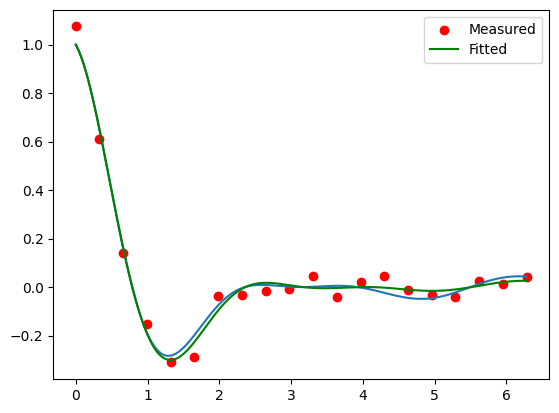

In [29]:
plt.plot(T, y_true)
plt.scatter(T_m, y_measured, color='red', label='Measured')
plt.plot(T, y_fitted, color='green', label='Fitted')
plt.legend()